In [1]:
# Wireless Power Transfer Lab

In [4]:
# Imports

import matplotlib.pyplot as plt
import numpy as np

# Plots the data
def plot_wpt(x_data, y_data, start, stop, name, names = '', lines = True):
    
    cols = ['b', 'y', 'k', 'r']
    #cols = ['k', 'r']
    markers = ["o", "^", "s", "p"]
    #markers = ["s", "p"]
    
    fig, ax = plt.subplots()
    
    r = range(start, stop)
    #r = range(stop - 1, start - 1, -1)
    
    for i in r:

        # Obtains the x-values
        x = x_data[i]["val"]
        x_unc = x_data[i]["unc"]


        # Obtains the y-values
        y = y_data[i]["val"]
        y_unc = y_data[i]["unc"]

        # Plots data
        if not names:
            plot_name = files[i][:-4]
        else:
            plot_name = names[i]
        ax.plot(x, y, c = cols[i], marker = markers[i], linestyle = "None", label = plot_name)
        
        # Plots the errors
        ax.errorbar(x, y, yerr = y_unc, xerr = x_unc, fmt = cols[i] + markers[i])

    # Add a legend
    ax.legend()
    
    # Sets the scale
    plt.xscale("log")
    
    
    if lines or "air" in names and "frequency" not in name:
        # Adds a horizontal line at -3 dB
        plt.axhline(y = -3, c = "k", linestyle = "--", linewidth = 1)

        # Adds vertical lines at -3 dB intercept
        intercepts = [4.5 * 2.54, 6.7 * 2.54]
        for intercept in intercepts:
            plt.axvline(x = intercept, c = "k", linestyle = "--", linewidth = 0.5)
    
    # Adds axis titles
    plt.xlabel("separation distance (cm)")
    
    if "frequency" in name:
        plt.ylabel("frequency of peak transmittance (MHz)")
        
    if "transmission" in name:
        plt.ylabel("peak transmittance (dB)")
    
    # Shows the graph
    #plt.show()
    plt.savefig(name + '.png', bbox_inches='tight')

In [2]:
# Reads our data file

# Chooses file to read
files = ["air.csv", "water.csv", "salt.csv", "salt_grid.csv"]
#files = ["water.csv"]
#files = ["air.csv", "water.csv", "salt.csv"]
#files = ["salt.csv", "salt_grid.csv"]
#files = files[:1] + files[2:] # Removes a file we don't want
#data_file = files[4]


# Prepares data arrays

# Contains the data for all measurements
seperations = []
frequencies = []
transmissions = []

# Gets the size of the cap
cap_size = 0.35 # inches!

# Reads and manipulates the data from each file
for i in range(len(files)):
    
    # Adds a "row" for this file
    seperations.append({"val": [], "unc": []})
    frequencies.append({"val": [], "unc": []})
    transmissions.append({"val": [], "unc": []}) # MAX transmittance
    
    # Contains the data for a given file
    data = []

    # Reads the file
    with open(files[i], "r") as f:
        for line in f:        
            data.append(line.split(","))

    # Removes the first row
    data = data[1:]
    
    # Does a few basic transformations
    for j in range(len(data)):
        for k in range(len(data[j])):
            
            # Converts fractions to numbers
            if "/" in data[j][k]:
                subwords = data[j][k].split("/")
                data[j][k] = float(subwords[0]) / float(subwords[1])

            # Casts data into a float
            data[j][k] = float(data[j][k])

    # Sorts the data by seperation distance
    data.sort(key=lambda x: x[1])


    # Places values into new arrays (for ease of access)
    for row in data:
        
        # Gets the values
        seperations[i]["val"].append(row[1])
        seperations[i]["unc"].append(row[2])

        frequencies[i]["val"].append(row[3])
        frequencies[i]["unc"].append(row[4])

        transmissions[i]["val"].append(row[5])
        transmissions[i]["unc"].append(row[6])
        
    # Add the depth of the cap
    if files[i] != "air.csv": # The air trial (the first trial) did not have a cap
        seperations[i]["val"] = [x_i + cap_size * 2 for x_i in seperations[i]["val"]] # Adds the depth of the cap
        seperations[i]["unc"] = [x_i * 2 for x_i in seperations[i]["unc"]] # Uncertainty on this measurement is the same as seperation, so double
    
    print(seperations[i]["val"])
    
    # Converts inches to cm
    for k in range(len(seperations[i]["val"])):
        seperations[i]["val"][k] *= 2.54
        seperations[i]["unc"][k] *= 2.54
        

[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.0, 10.0, 12.0]
[0.7, 1.2, 1.7, 2.7, 3.2, 3.7, 4.7, 6.7, 9.7]
[0.7, 0.95, 1.2, 1.7, 2.2, 2.7, 3.7, 4.7, 5.7]
[2.7, 3.7, 5.7]


In [3]:
# Obtains the uncertainty

# Holds the data from the uncertainty trials
data_unc = []


# Holds the values of the uncertainty trials
frequency_diff = []
seperation_diff = []
transmission_diff = []

# The file containing the uncertainty
file_unc = "water_unc.csv"

# Reads the file
with open(file_unc, "r") as f:
    for line in f:        
        data_unc.append(line.split(","))
        
# Removes the first row
data_unc = data_unc[1:]

# Does a few basic transformations
for i in range(len(data_unc)):
    for j in range(len(data_unc[i])):
        
        # Converts fractions to numbers
        if "/" in data_unc[i][j]:
            subwords = data_unc[i][j].split("/")
            data_unc[i][j] = float(subwords[0]) / float(subwords[1])
                  
        # Casts data_unc into a float
        data_unc[i][j] = float(data_unc[i][j])

# Sorts the data_unc by seperation distance
data_unc.sort(key=lambda x: x[1])

# Places the uncertainty data into the appropriate row
for row in data:
    frequency_diff.append(row[3])
    seperation_diff.append(row[1])
    transmission_diff.append(row[5])
    
    
# Calculates the errors
# ∂x_i = s_(n-1)|µ_u / (sqrt(n) * µ_u) * x_i
# Where x is the measurement (say, frequency or transmission)
# s is the standard deviation (about the average of the uncertainty trials)
# µ is the average, µ_u is the average of the uncertainty
#
# This gets the absolute uncertainty, converts it to relative uncertainty, then converts it to absolute for a given measurement

# Gets standard errors
df = np.std(frequency_diff) / np.sqrt(len(frequency_diff)) # Uncertainty at ~104.8 Mhz
dt = np.std(transmission_diff) / np.sqrt(len(transmission_diff)) # Uncertainty at ~-2.70 dB

# Gets the average value of the uncertainty runs
f_bar = np.mean(frequency_diff)
t_bar = np.mean(transmission_diff)

# Converts the error to relative error than back to absolute for a given value
for i in range(len(frequencies)):
    for j in range(len(frequencies[i]["val"])):
        frequencies[i]["unc"][j] = df / f_bar * frequencies[i]["val"][j]
        transmissions[i]["unc"][j] = dt / t_bar * transmissions[i]["val"][j]
    

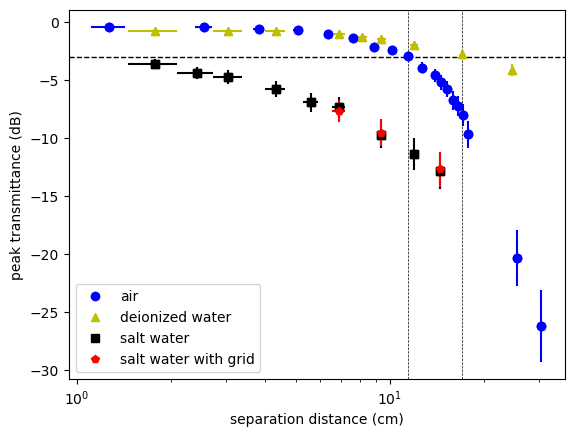

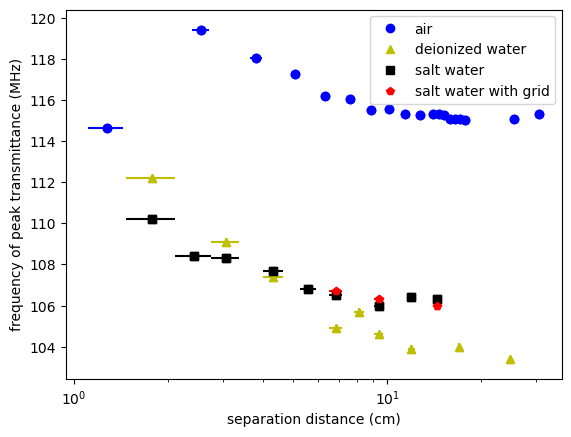

In [50]:
# Plots the graphs

# Determines which files to include on the plot
start, stop = 0, len(files)
#start, stop = 2, len(files)

names = ["air", "deionized water", "salt water", "salt water with grid"]
#names = ["no grid", "grid"]

# Transmission plot
plot_wpt(seperations, transmissions, start, stop, "transmission", names, lines = False)


# Frequency l
plot_wpt(seperations, frequencies, start, stop, "frequency", names, lines = False)

#print(seperations)
#print(transmissions)